In [1]:
%matplotlib inline 
#widget
import sys 
import xarray as xr
import numpy as np
import os 
import warnings
import yaml
from random import randint
import math
from datetime import datetime, timedelta

sys.path.append('/home/jvalenti/MOAD/analysis-jose/Source')
from OP_functions import *

In [2]:
config = ['/home/jvalenti/scratch/OParcels_runs/Parcels_outfall/outfall_runs.yaml']
path_runs = '/home/jvalenti/MOAD/results/Graham/' 
paths = path(0)
# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

path_NEMO = make_prefix(datetime(2019, 1, 1),paths['NEMO'])

jjii = xr.open_dataset('~/MOAD/grid/grid_from_lat_lon_mask999.nc')
finder(jjii,48,-123)

(193, 200)

In [3]:
coords = xr.open_dataset('/home/jvalenti/MOAD/grid/coordinates_seagrid_SalishSea201702.nc', decode_times=False)
mask = xr.open_dataset('/home/jvalenti/MOAD/grid2/mesh_mask202108_TDV.nc')

Text(0.5, 1.0, 'Salish Sea subregions')

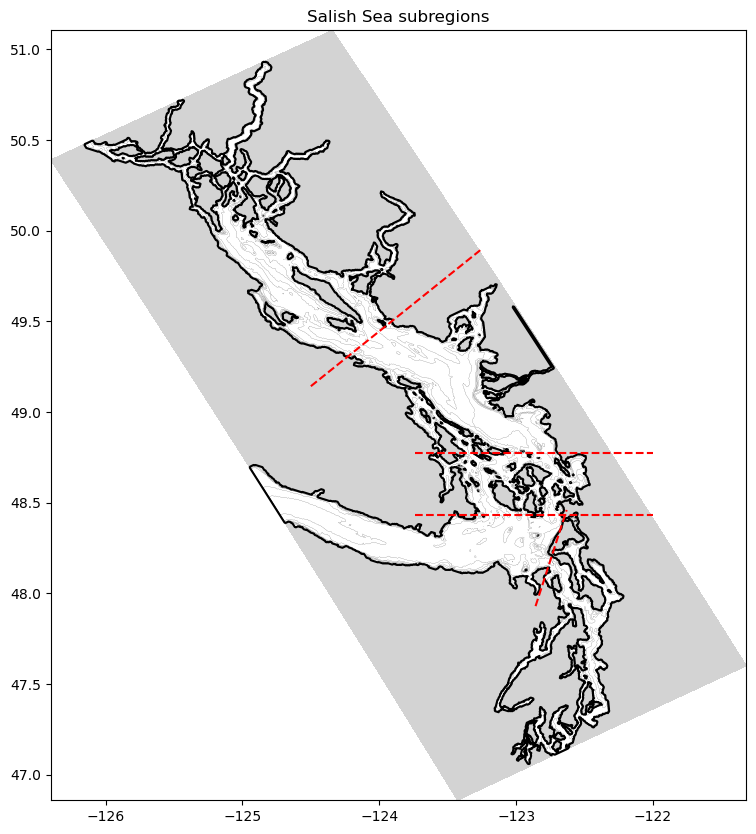

In [4]:
from matplotlib import pyplot as plt, animation, rc,colors
import cmocean
cm = cmocean.cm.dense

fig, ax = plt.subplots(1,1,figsize=(10, 10))

ax.contour(coords.nav_lon, coords.nav_lat, mask.mbathy[0,:,:],colors='k',linewidths=0.1)
ax.contourf(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='lightgray')
ax.contour(coords.nav_lon, coords.nav_lat, mask.tmask[0, 0, ...], levels=[-0.01, 0.01], colors='k')
#aa = ax.hist2d(DS.lon,DS.lat,100,cmap =cm,vmin=1e-5,vmax=2000)
ax.set_aspect(1/np.sin(np.deg2rad(49)))
Xline = np.linspace(-124.5,-122,100)
yline0 = (7/3)*Xline+334.6
yline1 = (20/33)*Xline+124.597
yline2 = np.zeros_like(Xline)+48.43
yline3 = np.zeros_like(Xline)+48.774
plt.plot(Xline[65:75],yline0[65:75],'r--')
plt.plot(Xline[:50],yline1[:50],'r--')
plt.plot(Xline[30:],yline2[30:],'r--')
plt.plot(Xline[30:],yline3[30:],'r--')

plt.title('Salish Sea subregions')

In [5]:
runs = {'250 s':['alpha120190101.nc',2],'500 s':['alpha_1_jan.nc',2],'1,000 s':['alpha220190101.nc',2],'2,500 s':['Runs_alpha0220190101_.nc',1],'5,000 s':['Run_Enero20190101_.nc',2],'10,000 s':['Runs_alpha0520190101_.nc',1],'50,000 s':['Runs_alpha0120190101_.nc',1]}

months = {'Jan':['Run_Enero20190101_.nc',1],'Feb':['Run_Febrero20190201_.nc',32],'Mar':['Run_Marzo20190301_.nc',61],'Jun':['Run_Junio20190601_.nc',152],'Jul':['Run_Julio20190701_.nc',183],'Aug':['Run_Agosto20190801_.nc',214]}

sub_areas=['Puget','JdF','Haro2','NSoG','CSSoG']
def cutting(data,area):
    if area=='Puget':
        data_new = data.loc[(data['lat']<48.43) & (data['lat']<(7/3)*data['lon']+334.6)]
    elif area=='JdF':
        data_new = pd.concat([data.loc[((data['lat']<48.43) & (data['lat']>(7/3)*data['lon']+334.6))],data.loc[((data['lat']>48.43) & (data['lat']<48.774) & (data['lon']<-124))]])
    elif area=='Haro':  
        data_new = data.loc[(data['lat']>48.43) & (data['lat']<48.774) & (data['lon']>-123.456) & (data['lon']<-123)]
    elif area=='Haro2':  
        data_new = data.loc[(data['lat']>48.43) & (data['lat']<48.774) & (data['lon']>-124)]
    elif area=='NSoG':
        data_new = data.loc[(data['lat']>(20/33)*data['lon']+124.597)]
    elif area=='CSSoG': 
        data_new = data.loc[(data['lat']>48.774)&(data['lat']<(20/33)*data['lon']+124.597)]
    else:
        print('Unrecognized subarea') 
        data_new = data
    return data_new

Parker's 2021 flow

In [9]:
ii,jj = finder(jjii,48.145078973929365, -122.75094025918668)

In [ ]:
meane = 40.9e3
df = 4.7e3
exch= np.linspace(meane+df,meane-df,8)

exch= list(exch[:3])+list(exch[-3:])
np.array(meanll).T[0]*13.7/(np.array(exch)*86400)

array([0.07601801, 0.07860066, 0.1131779 , 0.11989534, 0.12229127,
       0.13196407])

In [10]:
lim=10
for month in months:
    conc1 = np.load(path_runs+months[month][0].split('.')[0]+'.npy')*13.7
    limdep = mask.gdept_0[0,:,0,0].values
    limn = np.where(limdep>lim)[0][0]-1
    zdep = round(limdep[limn],2)
    print(f'checking for depth = {zdep}')
    admirup = conc1[:limn,int(ii/3),:]
    admirdeep = conc1[limn:,int(ii/3),:]
    weightsup = mask.e3t_0[0,:limn,int(ii/3),::3].values/np.sum(mask.e3t_0[0,:limn,int(ii/3),::3].values,axis=0)
    weightsdeep = mask.e3t_0[0,limn:,int(ii/3),::3].values/np.sum(mask.e3t_0[0,limn:,int(ii/3),::3].values,axis=0)
    #print(f'average concentration in {month} of upper {zdep}m {np.mean(admirup[mask.tmask[0,:lim,ii,::3]==1])}')
    #print(f'average concentration deeper than {zdep}m {np.mean(admirdeep[mask.tmask[0,lim:,ii,::3]==1])}')
    print(f'Difference in {month} upper vs lower {-np.average(admirup[mask.tmask[0,:limn,ii,::3]==1],weights=weightsup[mask.tmask[0,:limn,ii,::3]==1])+np.average(admirdeep[mask.tmask[0,limn:,ii,::3]==1],weights=weightsdeep[mask.tmask[0,limn:,ii,::3]==1])}')

checking for depth = 9.5
Difference in Jan upper vs lower 0.008828478460783773
checking for depth = 9.5
Difference in Feb upper vs lower 0.012019580577336708
checking for depth = 9.5
Difference in Mar upper vs lower 0.04418745082499492
checking for depth = 9.5
Difference in Jun upper vs lower 0.12019632437078806
checking for depth = 9.5
Difference in Jul upper vs lower 0.05280445116623003
checking for depth = 9.5
Difference in Aug upper vs lower 0.010593266971856585


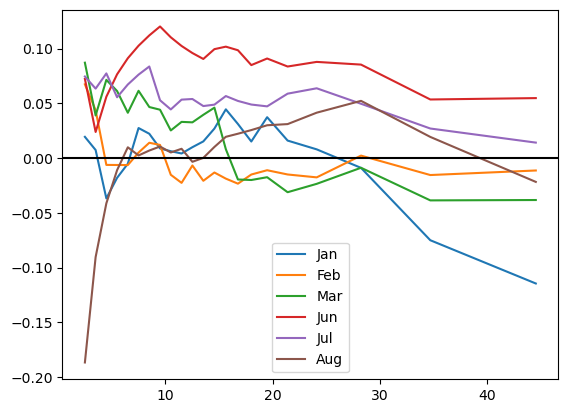

In [12]:
lim=25

for month in months:
    diff = []
    for lim in limdep[2:24]:
        conc1 = np.load(path_runs+months[month][0].split('.')[0]+'.npy')*13.7
        limdep = mask.gdept_0[0,:,0,0].values
        limn = np.where(limdep>lim)[0][0]-1
        zdep = round(limdep[limn],2)
        #print(f'checking for depth = {zdep}')
        admirup = conc1[:limn,int(ii/3),:]
        admirdeep = conc1[limn:,int(ii/3),:]
        weightsup = mask.e3t_0[0,:limn,int(ii/3),::3].values/np.sum(mask.e3t_0[0,:limn,int(ii/3),::3].values,axis=0)
        weightsdeep = mask.e3t_0[0,limn:,int(ii/3),::3].values/np.sum(mask.e3t_0[0,limn:,int(ii/3),::3].values,axis=0)
        #print(f'average concentration in {month} of upper {zdep}m {np.mean(admirup[mask.tmask[0,:lim,ii,::3]==1])}')
        #print(f'average concentration deeper than {zdep}m {np.mean(admirdeep[mask.tmask[0,lim:,ii,::3]==1])}')
        diff.append(-np.average(admirup[mask.tmask[0,:limn,ii,::3]==1],weights=weightsup[mask.tmask[0,:limn,ii,::3]==1])+np.average(admirdeep[mask.tmask[0,limn:,ii,::3]==1],weights=weightsdeep[mask.tmask[0,limn:,ii,::3]==1]))
    plt.plot(limdep[2:24],diff,label=month)
plt.legend()
plt.axhline(y=0,color='black')

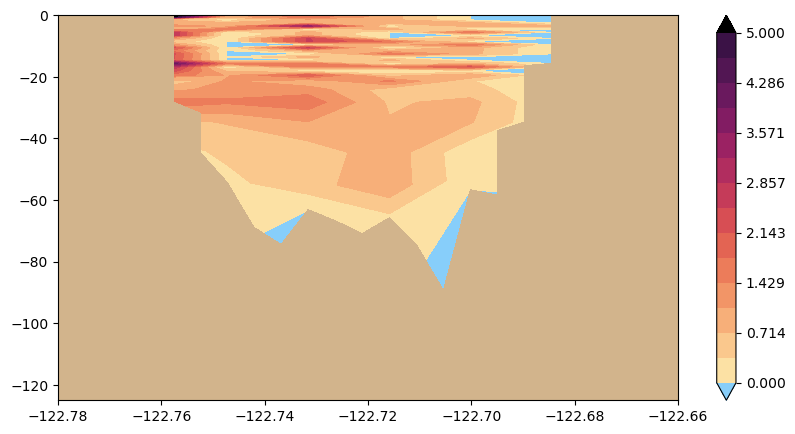

In [11]:
fig,ax = plt.subplots(1,1,figsize=(10,5))
Ni = 3
levels = np.linspace(0, 5, 15)
Lon,Depth = np.meshgrid(coords.nav_lon[ii,::Ni],mask.gdept_0[0,:,ii,0])
Lon2,Depth = np.meshgrid(coords.nav_lon[ii,:],mask.gdept_0[0,:,ii,0])
#Lon,Depth = np.meshgrid(coords.nav_lat[::Ni,jj],mask.gdept_0[0,:,0,jj])
ac = plt.contourf(Lon,-mask.gdept_0[0,:,ii,::Ni],conc1[:,int(ii/3),:],levels=levels,cmap=cmocean.cm.matter,extend='both')
#ac = plt.contourf(Lon,-mask.gdept_0[0,:,::Ni,jj],conc_winter[:,:,int(jj/3)],levels=levels,cmap=cmocean.cm.matter,extend='both')
ax.contourf(Lon2,-mask.gdept_0[0,:,ii,:], mask.tmask[0,:,ii,:], levels=[-0.01, 0.01], colors='tan')
ac.cmap.set_over('black')
ac.cmap.set_under('lightskyblue')
plt.ylim([-125,0])
plt.xlim([-122.78, -122.66])
plt.colorbar(ac)

In [67]:
month = {'Jan':1,'Feb':2,'Mar':3,'Jun':6,'Jul':7,'Aug':8}
for m in month:
    v = xr.open_dataset('/results/SalishSea/month-avg.201905/'+'SalishSea_1m_20190'+str(month[m])+'_20190'+str(month[m])+'_grid_V.nc', decode_times=False).vomecrty
    conc1 = np.load(path_runs+months[m][0].split('.')[0]+'.npy')*13.7
    admir = conc1[:,int(ii/3),:]
    admirout = admir[v[0,:,int(ii/3),::3]>0]
    admirin= admir[v[0,:,int(ii/3),::3]<0]

    weights = mask.e3t_0[0,:,int(ii/3),::3].values/np.sum(mask.e3t_0[0,:,int(ii/3),::3].values,axis=0)
    weightsin = weights[v[0,:,int(ii/3),::3]<0]
    weightsout = weights[v[0,:,int(ii/3),::3]>0]
    #print(f'average concentration in {month} of upper {zdep}m {np.mean(admirup[mask.tmask[0,:lim,ii,::3]==1])}')
    #print(f'average concentration deeper than {zdep}m {np.mean(admirdeep[mask.tmask[0,lim:,ii,::3]==1])}')
    print(f'Difference in {m} upper vs lower {np.average(admirin,weights=weightsin)-np.average(admirout,weights=weightsout)}')

Difference in Jan upper vs lower 0.008339685650825223
Difference in Feb upper vs lower 0.015560438154672085
Difference in Mar upper vs lower -0.0012720110268606508
Difference in Jun upper vs lower -0.002965819558711469
Difference in Jul upper vs lower -0.006526694351562322
Difference in Aug upper vs lower 0.005779078559697662


2.5125897860919255
-35.20119977898808
47.02786328834164
8.357092114610472
-22.69634541005608
2.4785664785663317
-44.31996831996832
41.235125235125224
0.4399564399564288
0.166320166320368
3.567132370352908
-42.44060304680717
34.93598547635962
5.227879074907256
-1.2903938748125117
3.6079596079595446
-60.14968814968813
50.9054549054549
4.033660033660036
1.602613602613617
3.5762795762794495
-59.65429165429164
54.67933867933869
18.42193842193841
-17.023265023264816
3.883971883971737
-68.26254826254825
47.653103653103656
1.5083655083655014
15.217107217107335


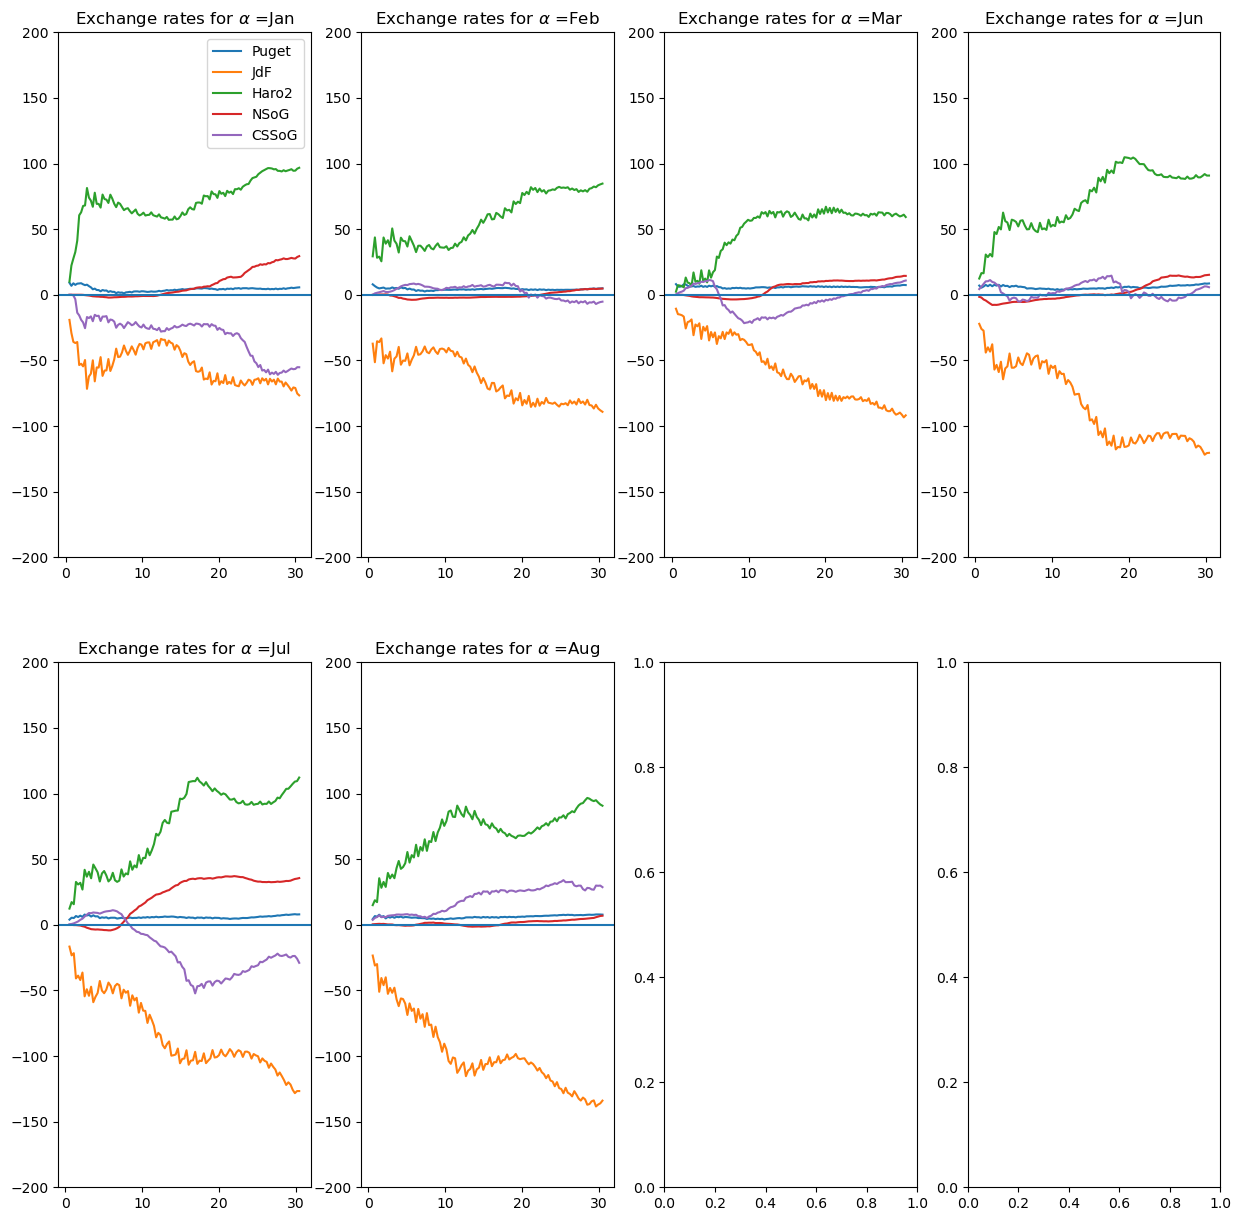

In [41]:
#alpha='50,000 s'
fig,axs = plt.subplots(2,4,figsize=(15,15))
for jj,alpha in enumerate(months):
    ds = xr.open_dataset(path_runs+months[alpha][0], decode_times=False)
    Source['deploy']=round((Source.Population*250*10)/(1e7/2),0)
    x = np.linspace(0,31,ds.dims['obs']-1)
    DS = ds.to_dataframe()
    DS = DS.dropna()
    DS = DS[DS.time>0]
    for area in sub_areas:
        DSn = cutting(DS,area)
        deploys = cutting_source(Source,area)
        count = []
        depcount = []
        timer = []
        for i in range(ds.dims['obs']-1):
            times= np.min(DSn.time)+i*6*3600
            timer.append(times/86400)
            depcount.append((times/3600)//10)
            count.append(len(DSn[DSn.time == times]))
        axs[jj//4,jj%4].plot(moving_average(x,5),moving_average((np.array(count)-(np.array(depcount)+1)*deploys)/(np.array(timer)*runs[alpha][1]),5),label=area) 
        axs[jj//4,jj%4].set_ylim([-100,100]) 
        print((np.mean(count[20:])-(np.mean(depcount[20:])+1)*deploys)/(runs[alpha][1]*times/86400))  
    axs[jj//4,jj%4].axhline(y=0) 
    axs[jj//4,jj%4].set_title(r'Exchange rates for $\alpha$ ='+f'{alpha}') 
axs[0,0].legend()